<a href="https://colab.research.google.com/github/Devika2605/EV_Vehicle_Charge_Demand/blob/main/EV_Vehicle_Charging_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib  # To save the model


In [6]:
import pandas as pd

file_path = '/content/drive/MyDrive/EV_Project/Electric_Vehicle_Population_By_County.csv'
df = pd.read_csv(file_path)


In [19]:
df.shape
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
Index: 20819 entries, 3923 to 15748
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20819 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20819 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20819 non-null  int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  int64         
 6   Electric Vehicle (EV) Total               20819 non-null  int64         
 7   Non-Electric Vehicle Total                20819 non-null  int64         
 8   Total Vehicles                            20819 non-null  int64         
 9   Percent Electric Vehicles     

Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles', 'Year', 'Month',
       'Quarter', 'EV_Growth', 'County_Encoded'],
      dtype='object')

In [20]:
df.isnull().sum()


,0
Date,0
County,86
State,86
Vehicle Primary Use,0
Battery Electric Vehicles (BEVs),0
Plug-In Hybrid Electric Vehicles (PHEVs),0
Electric Vehicle (EV) Total,0
Non-Electric Vehicle Total,0
Total Vehicles,0
Percent Electric Vehicles,0


In [24]:
df_cleaned = df.dropna(subset=['County', 'State'])


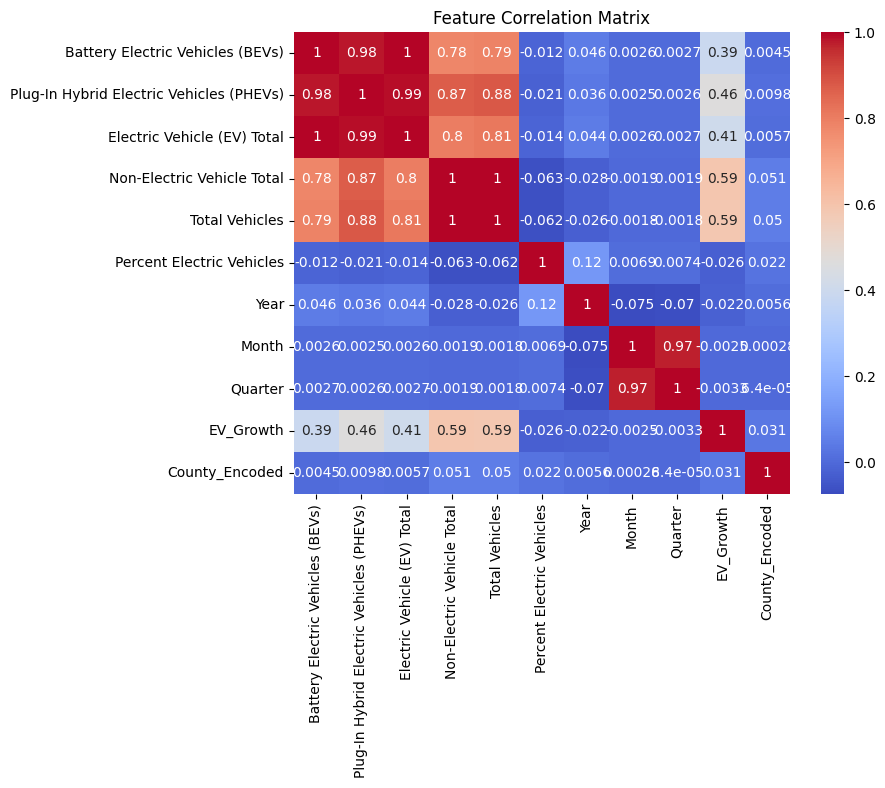

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [25]:
df['County'].fillna('Unknown', inplace=True)
df['State'].fillna('Unknown', inplace=True)


/tmp/ipython-input-25-4277517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['County'].fillna('Unknown', inplace=True)
/tmp/ipython-input-25-4277517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode County
le_county = LabelEncoder()
df['County_Encoded'] = le_county.fit_transform(df['County'])

# Encode State (optional if needed)
le_state = LabelEncoder()
df['State_Encoded'] = le_state.fit_transform(df['State'])


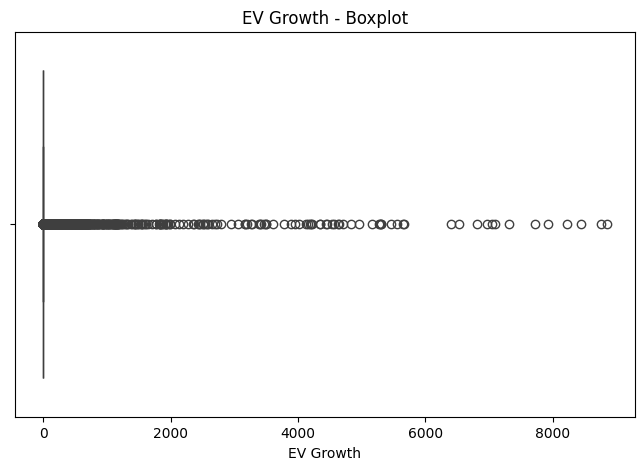

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['EV_Growth'])
plt.title('EV Growth - Boxplot')
plt.xlabel('EV Growth')
plt.show()


In [30]:
# Calculate Q1 and Q3
Q1 = df['EV_Growth'].quantile(0.25)
Q3 = df['EV_Growth'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = df[(df['EV_Growth'] < Q1 - 1.5 * IQR) | (df['EV_Growth'] > Q3 + 1.5 * IQR)]
print("Number of outliers in EV_Growth:", outliers.shape[0])


Number of outliers in EV_Growth: 7803


In [31]:
# Remove outliers (optional)
df = df[~((df['EV_Growth'] < Q1 - 1.5 * IQR) | (df['EV_Growth'] > Q3 + 1.5 * IQR))]


In [33]:
# Calculate Q1 and Q3 for 'Percent Electric Vehicles'
Q1_percent = df['Percent Electric Vehicles'].quantile(0.25)
Q3_percent = df['Percent Electric Vehicles'].quantile(0.75)
IQR_percent = Q3_percent - Q1_percent

# Define bounds for capping
lower_bound = Q1_percent - 1.5 * IQR_percent
upper_bound = Q3_percent + 1.5 * IQR_percent

# Capping the outliers:
df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,
                                 np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound,
                                          df['Percent Electric Vehicles']))

In [34]:
# Re-checking for outliers
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])


Number of outliers in 'Percent Electric Vehicles': 0
